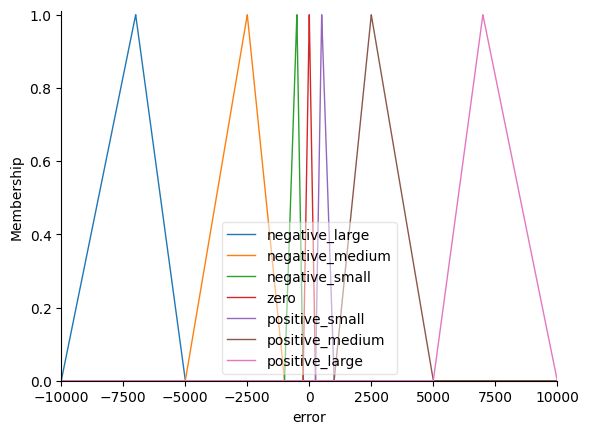

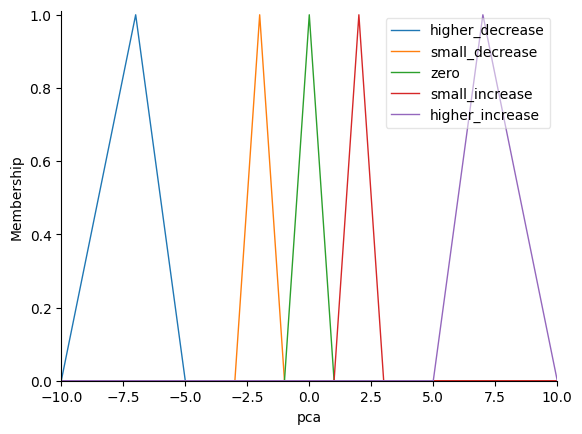

In [11]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

# Define the antecedent (input) and consequent (output) variables
error = ctrl.Antecedent(np.arange(-10000, 10001, 1), 'error')
pca = ctrl.Consequent(np.arange(-10, 11, 1), 'pca')

# Define the membership functions for error
error['negative_large'] = fuzz.trimf(error.universe, [-10001, -7000, -5000])
error['negative_medium'] = fuzz.trimf(error.universe, [-4999, -2500, -1000])
error['negative_small'] = fuzz.trimf(error.universe, [-999, -500, -250])
error['zero'] = fuzz.trimf(error.universe, [-249, 0, 250])
error['positive_small'] = fuzz.trimf(error.universe, [249, 500, 1000])
error['positive_medium'] = fuzz.trimf(error.universe, [1001, 2500, 5000])
error['positive_large'] = fuzz.trimf(error.universe, [5001, 7000, 10001])

# Plot the membership functions
error.view()
plt.show()

pca['higher_decrease'] = fuzz.trimf(pca.universe, [-10, -7, -5])
pca['small_decrease'] = fuzz.trimf(pca.universe, [-3, -2, -1])
pca['zero'] = fuzz.trimf(pca.universe, [-1, 0, 1])
pca['small_increase'] = fuzz.trimf(pca.universe, [1, 2, 3])
pca['higher_increase'] = fuzz.trimf(pca.universe, [5, 7, 10])


# Plot the membership functions
pca.view()
plt.show()

In [13]:
# Define the rules
rule1 = ctrl.Rule(error['negative_large'], pca['higher_decrease'])
rule2 = ctrl.Rule(error['negative_medium'], pca['small_decrease'])
rule3 = ctrl.Rule(error['zero'], pca['zero'])
rule4 = ctrl.Rule(error['positive_small'], pca['zero'])
rule5 = ctrl.Rule(error['positive_medium'], pca['small_increase'])
rule6 = ctrl.Rule(error['positive_large'], pca['higher_increase'])

# Create a control system and simulation
pca_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
pca_sim = ctrl.ControlSystemSimulation(pca_ctrl)

# Function to check rule activation for a given input value
def check_rule_activation(input_value):
    print(f"Input error: {input_value}")
    pca_sim.input['error'] = input_value
    pca_sim.compute()

# Test a range of input values
test_values = np.linspace(-10000, 10000, num=1)
for value in test_values:
    check_rule_activation(value)
    print("\n")


Input error: -10000.0


